# Theoretical Foundations of Buffer Stock Saving -- Interactive Figures

[![econ-ark.org](https://img.shields.io/badge/Powered%20by-Econ--ARK-3e8acc.svg)](https://econ-ark.org/materials/BufferStockTheory)

(Execute the cells below one at a time to activate the corresponding interactive tools)

In [1]:
# Some setup stuff
from builtins import breakpoint
# Get others' tools
from ipywidgets import interact, interactive, fixed, interact_manual

# Get HARK modeling tool
from HARK.ConsumptionSaving.ConsIndShockModel import IndShockConsumerType

# Get Dashboard tools
import Dashboard.dashboard_widget as BST

## Convergence of the Consumption Rules

Under the given parameter values, [the paper's first figure](http://econ.jhu.edu/people/ccarroll/papers/BufferStockTheory/#Convergence-of-the-Consumption-Rules) depicts the successive consumption rules that apply in the last period of life $(c_{T}(m))$, the second-to-last period, and earlier periods $(c_{T-n})$.  $c(m)$ is the consumption function to which these converge:

$$
c(m) = \lim_{n \uparrow \infty} c_{T-n}(m)
$$


In [2]:
# Risk aversion ρ and σ_ψ have the most interesting effects

cFuncsConverge_widget=interactive(
    BST.makeConvergencePlot,
    DiscFac=BST.DiscFac_widget[0],
    CRRA=BST.CRRA_widget[0],
    Rfree=BST.Rfree_widget[0],
    permShkStd=BST.permShkStd_widget[0],
)
cFuncsConverge_widget

interactive(children=(FloatSlider(value=0.96, continuous_update=False, description='β', max=0.99, min=0.92, st…

## [If the GIC Fails, Target Wealth is Infinite ](http://econ.jhu.edu/people/ccarroll/papers/BufferStockTheory/#The-GIC)

[A figure](http://econ.jhu.edu/people/ccarroll/papers/BufferStockTheory/#FVACnotGIC) depicts a solution when the **FVAC** [(Finite Value of Autarky Condition)](https://llorracc.github.io/BufferStockTheory/#FVAC) and **WRIC** [(Weak Return Impatience Condition)](https://llorracc.github.io/BufferStockTheory/#WRIC) hold (so that the model has a solution) but the **GIC** [(Growth Impatience Condition)](https://llorracc.github.io/BufferStockTheory/#GIC) fails:

\begin{eqnarray}
\mathbb{E}\left[\frac{\Phi}{\Gamma\psi}\right] & < & 1
\end{eqnarray}

(see [Calibrated Parameters](https://llorracc.github.io/BufferStockTheory/#Calibration) and [Definitions and Characteristics Calculated from Parameters](https://llorracc.github.io/BufferStockTheory/#Symbols))

Under the default parameter values, $\mathbb{E}[\psi^{-1}]=0.99$, $\Phi = 0.999$.  Use the slider to see what happens as you move $\Gamma$ from below to above its "cusp" value.  

| Param | Description | Code | Value |
| :---: | ---         | ---  | :---: |
| Γ | Permanent Income Growth Factor | $\texttt{PermGroFac}$ | 1.00 |
| R | Interest Factor | $\texttt{Rfree}$ | 1.06 |



In [2]:
# Make consumer more patient by doubling uncertainty
BST.base_params['permShkStd'] = [2 * 0.1]

# Give solution a bit more precision by increasing density of shocks
BST.base_params['permShkCount'] = BST.permShkCount = 7  #  extra points for accuracy

# Construct an instance, and unquietly describe it
GICNrmFailsButGICRawHolds = \
    IndShockConsumerType(**BST.base_params,
                         quietly=False,
                         messaging_level=10) # level 10 is all messages


(quietly=False and messaging_level < logging.WARNING, so some model information is provided below):

The model has the following parameter values:

	DiscFac: 0.96
	LivPrb: 1.0
	CRRA: 2.0
	Rfree: 1.04
	PermGroFac: 1.03
	IncShkDstn: <HARK.distribution.DiscreteDistribution object at 0x13a45ef10>
	permShkDstn: <HARK.distribution.DiscreteDistribution object at 0x13a446910>
	tranShkDstn: <HARK.distribution.DiscreteDistribution object at 0x13a45e220>
	BoroCnstArt: None
	MaxKinks: None
	solverType: HARK
	solveMethod: EGM
	eventTiming: EOP
	horizon: infinite
	args: ()

The model's transition equations are:

chosen_to_next_choice step:
	kNrm = aNrm
	RNrm = Rfree / (PermGroFac * permShk)
	bNrm = kNrm * RNrm
	yNrm = tranShk
	mNrm = bNrm + yNrm

choice_to_chosen step:
	aNrm = mNrm - cNrm


Because messaging_level is >= logging.INFO, infinite horizon conditions are reported below:


The Absolute Patience Factor, APF=0.99920 satisfies the Absolute Impatience Condition (AIC), APF < 1:
    https://eco

.

In [2]:
# Under starting parameters, this example has a steady state m but not a target m 
# (the consumption function intersects with the M growth but not the m change locus)
# If permanent shock std is reduced, it will have both steady state m and target m

GICFailsExample_widget = interactive(
    BST.makeGICFailExample,
    DiscFac=BST.DiscFac_widget[1],
    permShkStd=BST.permShkStd_alt_start_widget[1],
    UnempPrb=BST.UnempPrb_widget[1],
)
GICFailsExample_widget

interactive(children=(FloatSlider(value=0.96, continuous_update=False, description='β', max=0.99, min=0.92, st…

### [Balanced Growth "Steady State Equilibrium" $m$, "Target" m, Expected Consumption Growth, and Permanent Income Growth](https://econ.jhu.edu/people/ccarroll/papers/BufferStockTheory/#AnalysisoftheConvergedConsumptionFunction)

The next figure is shown in  [Analysis of the Converged Consumption Function](https://econ.jhu.edu/people/ccarroll/papers/BufferStockTheory/#cGroTargetFig), which shows the expected consumption growth factor $\mathrm{\mathbb{E}}_{t}[\pmb{\mathrm{c}}_{t+1}/\pmb{\mathrm{c}}_{t}]$ for a consumer behaving according to the converged consumption rule, along with the expected growth factor for market resources $\mathrm{\mathbb{E}}_{t}[\pmb{\mathrm{m}}_{t+1}/\pmb{\mathrm{m}}_{t}]$, and the expected growth factor for the ratio of market resources to permanent income, $\mathrm{\mathbb{E}}_{t}[m_{t+1}/m_{t}]$.


In [2]:
# Explore what happens as you make the consumer more patient in two ways: β ↑ and Γ ↓
cGroTargetFig_widget = interactive(
    BST.cGroTargetFig_make,
    PermGroFac=BST.PermGroFac_widget[2],
    DiscFac=BST.DiscFac_widget[2]
)
cGroTargetFig_widget

interactive(children=(FloatSlider(value=1.03, continuous_update=False, description='Γ', max=1.04, min=1.0, ste…

### [Consumption Function Bounds](https://econ.jhu.edu/people/ccarroll/papers/BufferStockTheory/#AnalysisOfTheConvergedConsumptionFunction)
[The next figure](https://econ.jhu.edu/people/ccarroll/papers/BufferStockTheory/#cFuncBounds)
illustrates theoretical bounds for the consumption function.

We define two useful variables: lower bound of $\kappa$ (the marginal propensity to consume) and the limit of $h$ (Human wealth), along with some functions such as the limiting perfect foresight consumption function $\bar{c}(m)$, the upper bound function $\bar{\bar c}(m)$, and the lower bound function $\underline{c}(m)$.

Recall that the Perfect Forsight Return Impatience Condition is:
\begin{eqnarray}
(R \beta)^{1/\rho} & < & R
\\ \beta & < & R^{\rho-1}
\end{eqnarray}

In the figure below, we set $R$ and $\Gamma$ to fixed values of 1.0.  Explore what happens to the consumption function as you move the parameters as far as you can toward the perfect foresight model and the time preference factor up toward 1 (warning: the model takes longer to solve if the RIC is close to failing; be patient).  What would you expect to see if the upper boundary of the figure were extended far enough?  

Notice that the model with uncertainty gets very close to the perfect foresight model only when the uncertainty is tuned down to the very lowest possible levels and the time preference rate is set to a high number.

interactive(children=(FloatSlider(value=0.005, continuous_update=False, description='℘', max=0.05, min=0.001, …

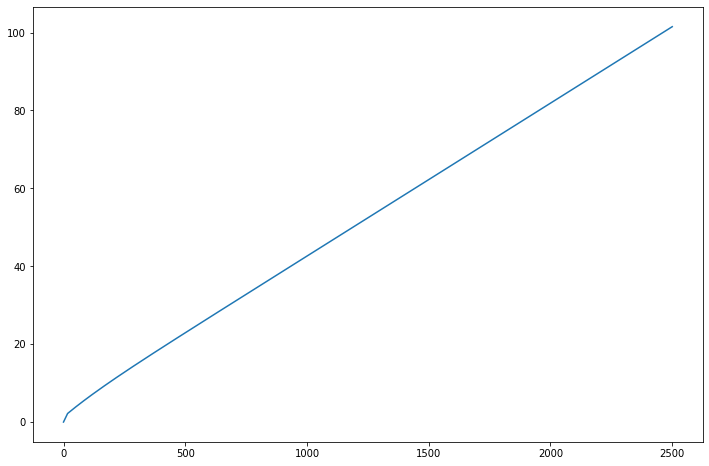

In [3]:
cFuncBounds_widget = interactive(
    BST.makeBoundsFigure,
    UnempPrb=BST.UnempPrb_widget[3],
    permShkStd=BST.permShkStd_widget[3],
    TranShkStd=BST.TranShkStd_widget[3],
    DiscFac=BST.DiscFac_widget[3],
    CRRA=BST.CRRA_widget[3]
)
cFuncBounds_widget

### [The Consumption Function and Target $m$](https://econ.jhu.edu/people/ccarroll/papers/BufferStockTheory/#cFuncBounds)

This figure shows the $\mathrm{\mathbb{E}}_{t}[\Delta m_{t+1}]$ and consumption function $c(m_{t})$, along with the intersection of these two functions, which defines the target value of $m$.

Use the sliders to explore the effects of transitory and permanent uncertainty, and of relative risk aversion ρ.

In [ ]:
cRatTargetFig_widget = interactive(
    BST.makeTargetMfig,
    Rfree=BST.Rfree_widget[4],
    DiscFac=BST.DiscFac_widget[4],
    CRRA=BST.CRRA_widget[4],
    permShkStd=BST.permShkStd_widget[4],
    TranShkStd=BST.TranShkStd_widget[4],
)
cRatTargetFig_widget

### [Upper and Lower Limits of the Marginal Propensity to Consume](https://econ.jhu.edu/people/ccarroll/papers/BufferStockTheory/#MPCLimits)

This figure from the paper requires a very fine grid in order to capture the smooth variation in the MPC.  

As a result, recomputation of the figure is too slow to be usable as a widget in real time (with current technology).